In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')

# Sort the data by load values in descending order
sorted_data = data.sort_values(by='FR_load_forecast_entsoe_transparency', ascending=False)

# Add a column for ranks
sorted_data['rank'] = range(1, len(sorted_data) + 1)


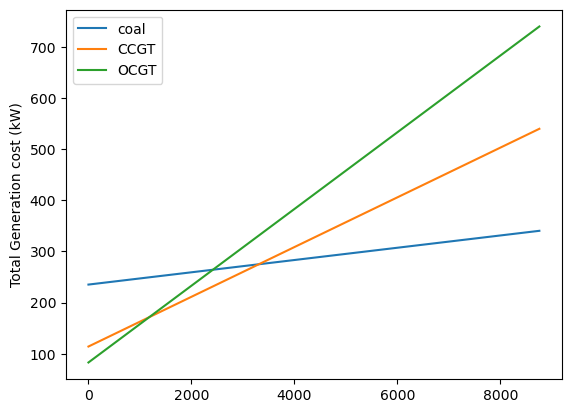

In [4]:
F=[0.03*2000,0.03*950,0.03*700]
EA=[175.2252157,85.60445144,61.91153839]
plt.figure()
x_values = np.linspace(0, 8759, 8760)  
y_values = EA[0]+F[0] + 0.012 * x_values
plt.plot(x_values, y_values, label='coal')
x_values = np.linspace(0, 8759, 8760)  
y_values = EA[1]+F[1]+0.0486 *x_values
plt.plot(x_values, y_values, label='CCGT')
x_values = np.linspace(0, 8759, 8760)  
y_values = EA[2]+F[2]+0.075 * x_values
plt.plot(x_values, y_values, label='OCGT')
plt.ylabel('Total Generation cost (kW)')
plt.legend()
plt.show()

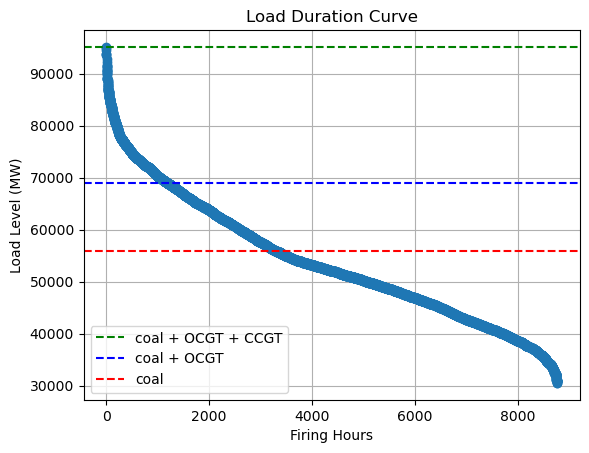

In [5]:
# Plot the load duration curve
plt.figure()
plt.plot(sorted_data['rank'], sorted_data['FR_load_forecast_entsoe_transparency'], marker='o', linestyle='-')

# Valeur constante pour y = valeur kg
k=[55800.0, 13200.0, 21450.0]
y_value = k[0]
y= k[0] + k[2]
y_last=k[0]+ k[1] + k[2]

# Tracer la droite horizontale
plt.axhline(y=y_last, color='b', linestyle='--',label= 'coal + CCGT + OCGT ')
plt.axhline(y=y, color='g', linestyle='--',label='coal + CCGT')
plt.axhline(y=y_value, color='r', linestyle='--',label="coal")

plt.title('Load Duration Curve')
plt.xlabel('Firing Hours')
plt.ylabel('Load Level (MW)')
plt.legend()
plt.grid(True)
plt.show()